In [280]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray


def datos_prueba(t_max:float, dt:float, amplitudes:NDArray[float],
  frecuencias:NDArray[float], ruido:float=0.0) -> NDArray[float]:
  ts = np.arange(0.,t_max,dt)
  ys = np.zeros_like(ts,dtype=float)
  for A,f in zip(amplitudes,frecuencias):
    ys += A*np.sin(2*np.pi*f*ts)
  ys += np.random.normal(loc=0,size=len(ys),scale=ruido) if ruido else 0
  return ts,ys


def Fourier(t:NDArray[float], y:NDArray[float], f:float) -> complex:
  FFT=0
  FFT = np.sum(np.array([a*np.exp((-2*np.pi*f*p)*1j) for a,p in zip(y,t)]))
  #FFT=np.sum(((y* np.exp((-2*np.pi*f*t)*1j))))
  return FFT



In [ ]:
t_max=15
d_t=0.1
frecuencias=[0.25]
amplitudes=[1]

frecuencias_grafica=np.linspace(0,7.5,1000)

#señales generadas
ts_sin_ruido, ys_sin_ruido = datos_prueba(t_max, d_t, amplitudes, frecuencias, ruido=0)
ts_con_ruido, ys_con_ruido = datos_prueba(t_max, d_t, amplitudes, frecuencias, ruido=3)

#transformadas
transformada_sin_ruido = np.array([Fourier(ts_sin_ruido, ys_sin_ruido, f) for f in frecuencias_grafica])
transformada_con_ruido = np.array([Fourier(ts_con_ruido, ys_con_ruido, f) for f in frecuencias_grafica])


x=np.array([i.real for i in transformada_sin_ruido])
y=np.array([i.imag for i in transformada_sin_ruido])

plt.plot(x,y)
plt.grid()
plt.show()
#gráficas
plt.plot(ts_sin_ruido,ys_sin_ruido)
plt.title("Señal sin ruido")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.show()
'''plt.plot(ts_con_ruido,ys_con_ruido)
plt.title("Señal con ruido")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.show()
plt.plot(frecuencias_grafica, np.abs(transformada_con_ruido), color='red')
plt.title("Transformada con ruido")
plt.xlabel("Frecuencia")
plt.xlim(0,1.5)
plt.show()'''
plt.plot(frecuencias_grafica, np.abs(transformada_sin_ruido), color='blue')
plt.title("Transformada sin ruido")
plt.xlabel("Frecuencia")
plt.xlim(0,1.5)
plt.legend()
plt.show()

In [216]:
def FWHM(inicio, x, y):
    ymed = y[inicio]/2
    """
        Esta función busca hacia ambas direcciones a partir del indice de un máximo de un array,
        buscando un valor muy cercano a ymax/2.
        devuelve el fwhm, y el valor inicial del intervalo.
    """
    #Busqueda hacia la izquierda
    x_med=[]
    i = inicio
    while i > 1:
        if y[i] == ymed:
            x_med.append(x[i])
            i = 1
        if (y[i]>ymed and y[i-1]<ymed):
            if abs(y[i+1]-ymed)  > abs(y[i]-ymed):
                x_med.append(x[i])
            else:
                x_med.append(x[i+1])
            i=1
        i-=1
    #Buscamos hacia la derecha

    i = inicio
    while i < len(x):
        if y[i] == ymed:
            x_med.append(x[i])
            i=len(x)
        if (y[i]>ymed and y[i+1]<ymed):
            if abs(y[i+1]-ymed)  > abs(y[i]-ymed):
                x_med.append(x[i])
            else:
                x_med.append(x[i+1])
            i=len(x)
        i+=1
    fwhm = x_med[1] - x_med[0]
    return fwhm, x_med[0]




def Empaquetado(lista_a_ubicar, x, y): #Me devuelve las posiciones de los maximos
    y_res= []
    x_res= []
    indice = []
    for b in lista_a_ubicar:
        i=0
        while i < len(x):
            if y[i] == b:
                y_res.append(b)
                x_res.append(x[i])
                indice.append(i)
                i=len(x)
            i+=1
    return x_res, y_res, indice

In [221]:
frecuencia_1b=[0.5]
amplitud_1b=[1]
t_max_1b=np.linspace(10,300,39)
lista_fwhm=[]
frecuencias_grafica_1b=np.linspace(0,5,100)
for i in t_max_1b:
  ts_1b, ys_1b = datos_prueba(i, d_t, amplitud_1b, frecuencia_1b, ruido=0)

  transformada_1b=abs(np.array([Fourier(ts_1b, ys_1b, f) for f in frecuencias_grafica_1b]))

  maximo=max(transformada_1b)
  x_pico, y_pico, indice_max_pico = Empaquetado([maximo], frecuencias_grafica_1b, transformada_1b)
  fwhm_pico, lin_pico = FWHM(indice_max_pico[0], frecuencias_grafica_1b, transformada_1b)
  lista_fwhm.append(fwhm_pico)

'''plt.plot(t_max_1b,lista_fwhm)
plt.xlabel("Tiempo maximo")
plt.ylabel("FWHM")
plt.xlim(10,300)
plt.show()'''

print(lista_fwhm)

lista1=[0.12012012012012013, 0.060060060060060094, 0.04004004004004008, 0.030030030030030075, 0.02002002002002007, 0.02002002002002007, 0.015015015015015065, 0.010010010010010062, 0.010010010010010062, 0.010010010010010062, 0.010010010010010062, 0.010010010010010062, 0.010010010010010062, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
lista2=[0.12004801920768304, 0.06002400960384152, 0.04001600640256109, 0.02801120448179273, 0.02400960384153661, 0.02000800320128049, 0.01600640256102437, 0.014005602240896364, 0.012004801920768304, 0.012004801920768304, 0.010004001600640244, 0.008003201280512184, 0.008003201280512184, 0.008003201280512184, 0.008003201280512184, 0.006002400960384124, 0.006002400960384124, 0.006002400960384124, 0.0040016006402560644, 0.0040016006402560644, 0.0040016006402560644, 0.0040016006402560644, 0.0040016006402560644, 0.0040016006402560644, 0.0040016006402560644, 0.0040016006402560644, 0.0040016006402560644, 0.0040016006402560644, 0.0040016006402560644, 0.0040016006402560644]
lista3=[0.12051205120512049, 0.06000600060006006, 0.04000400040004004, 0.030003000300029947, 0.02400240024002398, 0.02000200020002002, 0.01700170017001701, 0.015001500150014946, 0.013001300130012994, 0.01200120012001199, 0.01100110011001093, 0.010001000100010038, 0.009000900090008979, 0.008000800080007975, 0.008000800080007975, 0.0070007000700070265, 0.0070007000700070265, 0.006500650065006552, 0.006000600060006023, 0.006000600060006023, 0.005500550055005549, 0.005000500050005019, 0.005000500050005019, 0.005000500050005019, 0.004500450045004489, 0.004500450045004489, 0.00400040004000396, 0.00400040004000396, 0.00400040004000396, 0.00400040004000396]
lista4_39=[0.12057831876107211, 0.06771815532316139, 0.04771701240070858, 0.03628778787359277, 0.029715983770501164, 0.02514429395965484, 0.02142979598834216, 0.018858220469741116, 0.0165723755643179, 0.015143722498428436, 0.013715069432538973, 0.012572146979827392, 0.011714955140293692, 0.010857763300760048, 0.010286302074404174, 0.009714840848048467, 0.009143379621692649, 0.008571918395336942, 0.008000457168981068, 0.007428995942625249, 0.007428995942625249, 0.006857534716269542, 0.006571804103091661, 0.006286073489913724, 0.006286073489913724, 0.00571461226355785, 0.00571461226355785, 0.005428881650379969, 0.005143151037202143, 0.005143151037202143, 0.004857420424024261, 0.004571689810846324, 0.004571689810846324, 0.004571689810846324, 0.004285959197668443, 0.004285959197668443, 0.004000228584490617, 0.004000228584490617, 0.004000228584490617]
'''plt.plot(t_max_1b,lista1,label='lista1')
plt.plot(t_max_1b,lista2,label='lista2')
plt.plot(t_max_1b,lista3,label='lista3')
plt.xlabel("Tiempo maximo")
plt.ylabel("FWHM")
plt.xlim(10,300)
plt.legend()
plt.show()'''
plt.plot(t_max_1b,lista4_39)

IndexError: list index out of range

1.c) f Nyquist: 6.985e7 Hz
0.16234734734734738
aaa 1416.6721231474423


c:\Users\pablo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
c:\Users\pablo\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


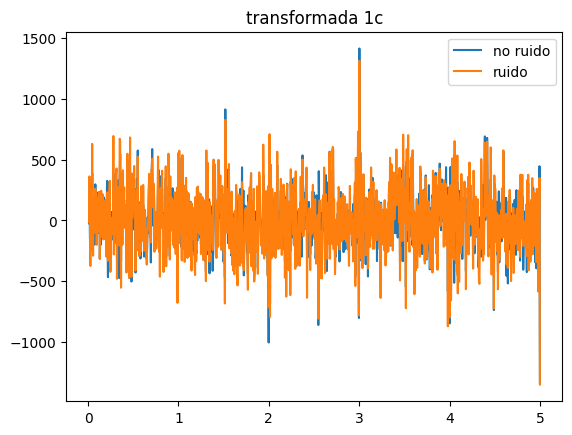

In [329]:
#1.c

import numpy as np
from scipy.signal import find_peaks
import random
archivo = "C:/Users/pablo/Downloads/datosmetodos.dat"
tiempo=[]
intensidad=[]
incertidumbre=[]
#Leo el archivo
with open(archivo, "r") as file:
    for linea in file:
        # Evitar líneas vacías o comentarios (si las hay)
        if linea.strip() and not linea.startswith("#"):  # Omite líneas vacías o que comienzan con '#'
            # Separar la línea por espacios (o puedes usar .split() si los valores están separados por espacios o tabuladores)
            datos = linea.split()
            if len(datos) >= 2:  # Asegurarse de que haya al menos dos columnas
                # Convertir las primeras dos columnas a tipo numérico
                tiempo.append(float(datos[0]))
                intensidad.append(float(datos[1]))
                incertidumbre.append(float(datos[1]))
intensidad_ruido = np.array([intensidad_dato + random.uniform(-sigma, sigma) for intensidad_dato, sigma in zip(intensidad, incertidumbre)])#genero la trasformada FFT(f) en funcion de f
#frecuencias_grafica_1c=np.linspace(6.985e+7 -1000, 6.985e+7+1000,100)
frecuencias_grafica_1c=np.linspace(0.01, 5,1000)

transformada_1c=(np.array([Fourier(tiempo,intensidad,f) for f in frecuencias_grafica_1c]))
transformada_1c_ruido=(np.array([Fourier(tiempo,intensidad_ruido,f) for f in frecuencias_grafica_1c]))

plt.title('transformada 1c')

print("1.c) f Nyquist: 6.985e7 Hz")

peaks,alpha=find_peaks(transformada_1c_ruido,height=600)
print((frecuencias_grafica_1c[peaks[1]]+frecuencias_grafica_1c[peaks[0]])/2)
print('aaa',abs(np.max(transformada_1c)))
pepe =(frecuencias_grafica_1c[peaks[1]]+frecuencias_grafica_1c[peaks[0]])/2
plt.plot(frecuencias_grafica_1c,transformada_1c,label='no ruido')
#plt.plot(frecuencias_grafica_1c[peaks], transformada_1c[peaks],'ro')
plt.plot(frecuencias_grafica_1c,transformada_1c_ruido,label='ruido')
#plt.axvline(x=pepe,color='r',linestyle='--')
plt.legend()
plt.show()


plt.show()


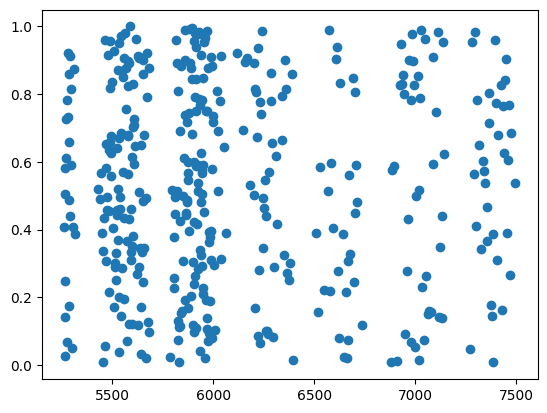

In [335]:
frecuencia_muestreo=2*1416
fase=np.array([(frecuencia_muestreo*t)%(1) for t in tiempo])
plt.scatter(tiempo,fase)
plt.show()

In [203]:
def primo(n):
    i=3
    es_primo=True
    divisores=[]
    if n%2==0:
        return False 
    while i<=((n//(n**0.5)) ) and es_primo==True:
        if n%i==0:
            es_primo=False
            divisores.append(i)
        i+=2
    return es_primo,divisores  

print(primo(1047290000293))


(True, [])


10.0


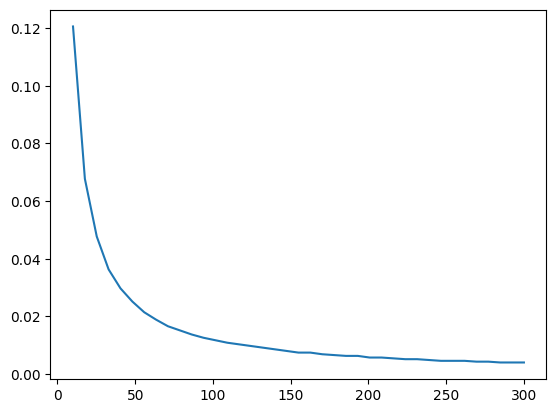

In [237]:
def is_primo(n):
    primo=True
    divisores=[]
    for i in range(2,n):
        if n%i==0:
            primo=False
            divisores.append(i)
    return primo,divisores

#print(is_primo(1047290000293))

aaa=(np.linspace(10,300,39))
lista4_39=[0.12057831876107211, 0.06771815532316139, 0.04771701240070858, 0.03628778787359277, 0.029715983770501164, 0.02514429395965484, 0.02142979598834216, 0.018858220469741116, 0.0165723755643179, 0.015143722498428436, 0.013715069432538973, 0.012572146979827392, 0.011714955140293692, 0.010857763300760048, 0.010286302074404174, 0.009714840848048467, 0.009143379621692649, 0.008571918395336942, 0.008000457168981068, 0.007428995942625249, 0.007428995942625249, 0.006857534716269542, 0.006571804103091661, 0.006286073489913724, 0.006286073489913724, 0.00571461226355785, 0.00571461226355785, 0.005428881650379969, 0.005143151037202143, 0.005143151037202143, 0.004857420424024261, 0.004571689810846324, 0.004571689810846324, 0.004571689810846324, 0.004285959197668443, 0.004285959197668443, 0.004000228584490617, 0.004000228584490617, 0.004000228584490617]
plt.plot(aaa,lista4_39)

prueba=np.linspace(0,10,17500)
print(max(prueba))